### **Introduction to the Dataset**
---------------

* #####  **Variables in the Dataset**

`Age` - Age of the patient

`Sex` - Sex of the patient

`Chest pain type` ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`Resting blood pressure`- in mm Hg

`Cholesterol` - in mg/dl fetched via BMI sensor

`FastingBS` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`RestingECG` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`MaxHR`  - Maximum heart rate achieved

`ExerciseAngina` - Exercise induced angina ~ 1 = Yes, 0 = No

`Oldpeak` - Previous peak

`ST_slope` - Slope

`Heart Disease` - Target variable

------------

* ##### **Aims and Objectives**
To perform Exploratory Data Analysis (EDA), build models to predict is prone to heart attack or not.

##### **Packages used in the project**

In [1]:
# Importing the basic libraries

import numpy as np
import pandas as pd

# To avoid the red text boxes during execution
import warnings
warnings.filterwarnings('ignore')

# Importing the Libnraries for visualizations

import matplotlib.pyplot as plt
import seaborn as sns

* ##### **Loading in the Dataset**

In [3]:
df = pd.read_csv(r"C:\Users\russe\OneDrive\Desktop\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


* ##### **Understanding the Data**

In [4]:
# Checking the shape of the dataframe

df.shape

(918, 12)

In [5]:
# Descriptive Stats for the Data

df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
# Preview of the first 5 rows of the data

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Checking for unique values in each column
pd.set_option("display.max_rows",12)

dict1 = {}
for i in list(df.columns):
    dict1[i] = df[i].value_counts().shape[0]

unique_dict = pd.DataFrame(dict1,index=["unique count"]).transpose()

unique_dict

,unique count
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


### **Pre-processing the data**
------

In [8]:
# Create a copy of the dataframe

df_rev = pd.DataFrame.copy(df)

In [9]:
# Checking the Datatypes of the columns

df_rev.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
# Checking the null values

df_rev.isnull().sum()
df_rev.dropna(inplace=True)

In [11]:
# Checking for duplicate values

df_rev.duplicated().sum()

0

### **Exploratory Data Analysis using Visualizations**
------

* ##### **Countplot of the categorical features**

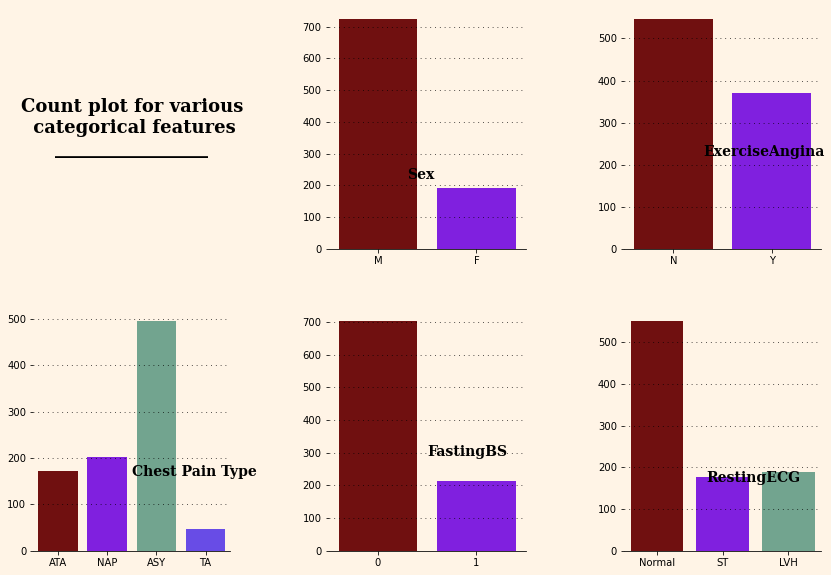

In [12]:
fig = plt.figure(figsize=(30,10))
gs = fig.add_gridspec(2,6)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#fff4e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df_rev,x='Sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'ExerciseAngina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df_rev,x='ExerciseAngina',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Cestpain Type count
ax3.text(1.5, 162, 'Chest Pain Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df_rev,x='ChestPainType',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")


# FastingBS count
ax4.text(0.5, 290, 'FastingBS', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df_rev,x='FastingBS',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")


# RestingECG count
ax5.text(0.75, 165, 'RestingECG', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df_rev,x='RestingECG',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)



* ##### **Countplot of the continuous features**

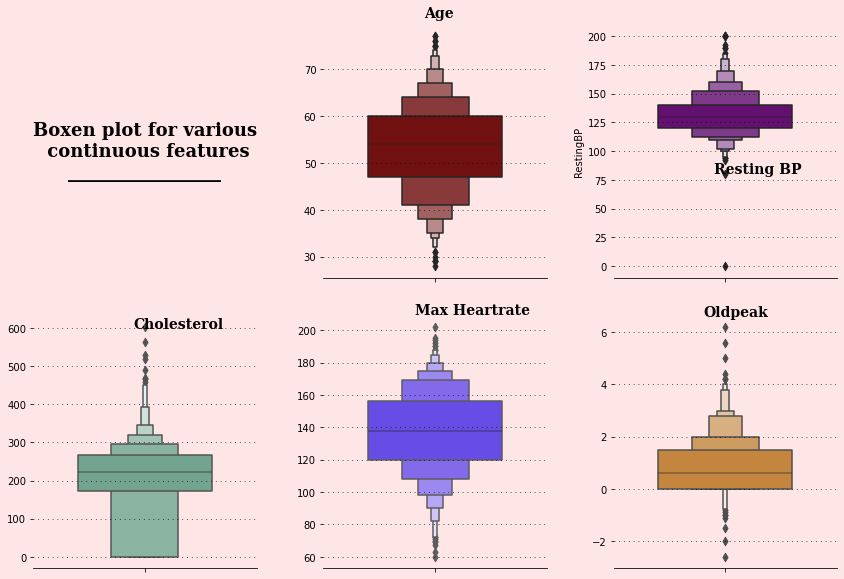

In [13]:
fig = plt.figure(figsize=(30,10))
gs = fig.add_gridspec(2,6)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)  
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df_rev['Age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting Blood Pressure 
ax2.text(-0.05, 81, 'Resting BP', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df_rev['RestingBP'],palette=["#6f0080"],width=0.6)
ax2.set_xlabel("")
ax3.set_ylabel("")

# Cholesterol 
ax3.text(-0.05, 600, 'Cholesterol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['Cholesterol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Maximum Heartrate 
ax4.text(-0.09, 210, 'Max Heartrate', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['MaxHR'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

* ##### **Countplot of the target variable**

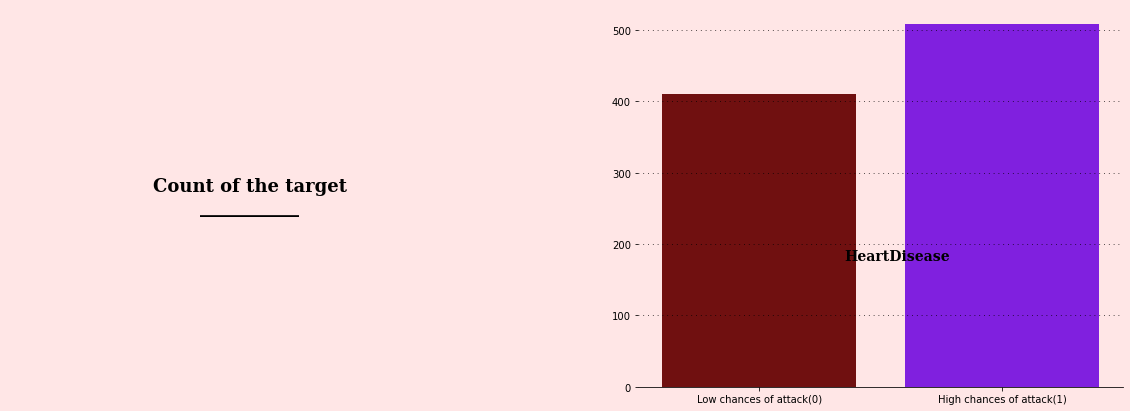

In [14]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"HeartDisease",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df_rev, x = 'HeartDisease',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

* ##### **Gettting Columns with object and (integer or float) data type**

In [15]:
categorical_features = []
continuous_features = []

for x in df_rev.columns:
    if df_rev[x].dtype == 'object':
        categorical_features.append(x)
    else:
        continuous_features.append(x)

print(categorical_features)
print(continuous_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


* ##### **Co-relation Matrix**

In [16]:
continuous_df = df_rev[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

                  Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
Age          1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612
RestingBP    0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803
Cholesterol -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148
FastingBS    0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698
MaxHR       -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691
Oldpeak      0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000


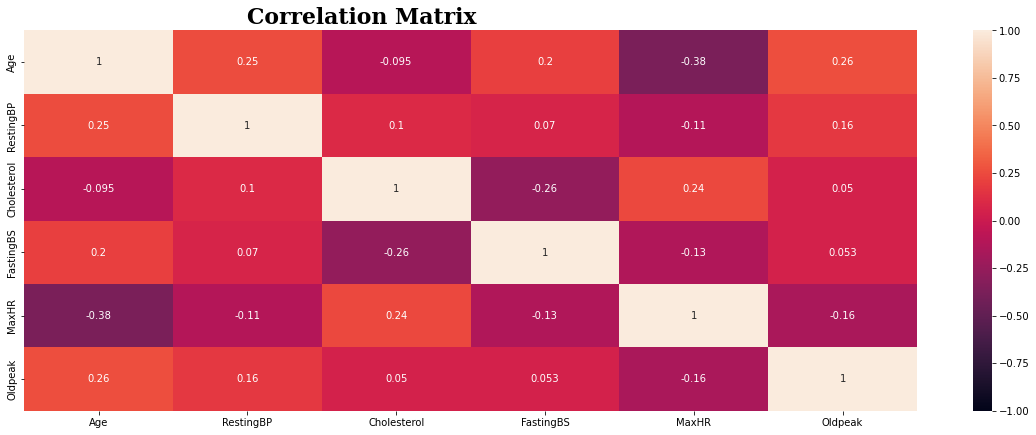

In [21]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
corr_df  = continuous_df.corr(method='pearson')
color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(corr_df))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

* ##### **Distribution of continuous features with respect to the Target Variable**

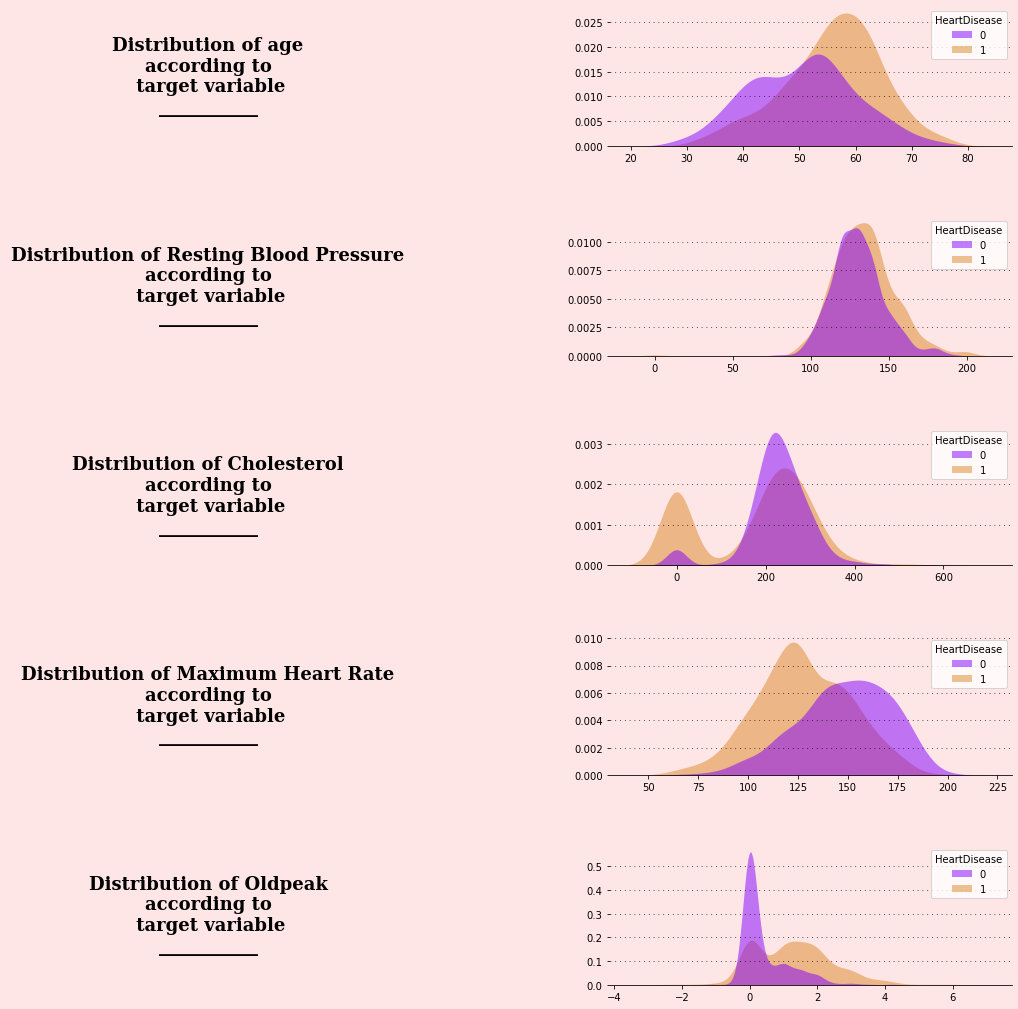

In [22]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_rev, x='Age',hue="HeartDisease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting Blood Pressure title
ax2.text(0.5,0.5,"Distribution of Resting Blood Pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Resting Blood Pressure
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_rev, x='RestingBP',hue="HeartDisease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cholesterol title
ax4.text(0.5,0.5,"Distribution of Cholesterol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Cholesterol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_rev, x='Cholesterol',hue="HeartDisease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Maximum Heartrate
ax6.text(0.5,0.5,"Distribution of Maximum Heart Rate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Maximum HEart Rate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_rev, x='MaxHR',hue="HeartDisease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of Oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='Oldpeak',hue="HeartDisease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

* ##### **Pairplot of the entire DataSet**

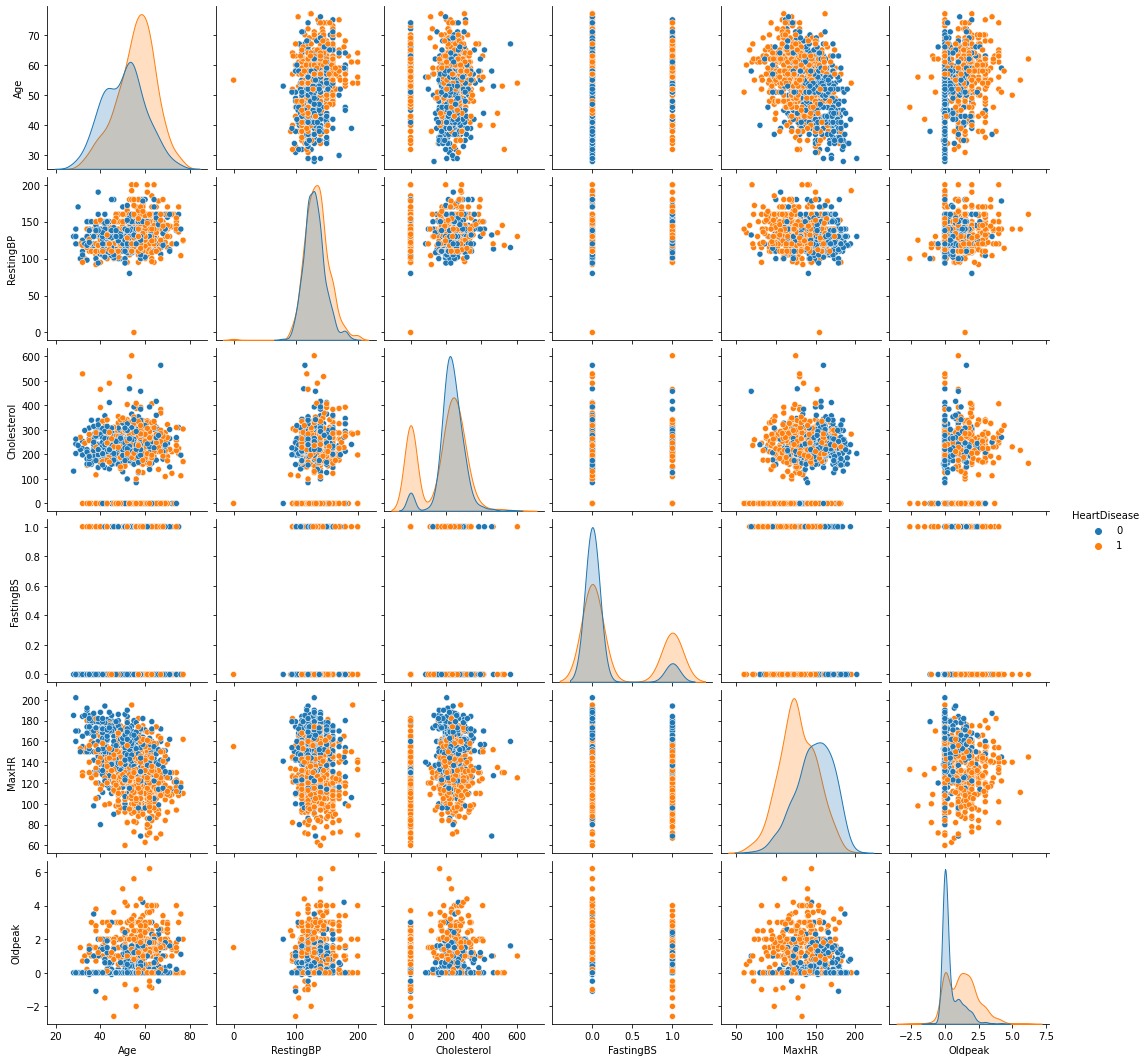

In [23]:
sns.pairplot(df_rev,hue='HeartDisease')
plt.show()

* ##### **Conclusions from Exploratory Data Analysis**

1. There are certain number of outliers in all the continuous features.
2. The given data consists of twice the number of males as compared to females.
3. The is no co-relation(auto-corelation between the independent variables).
4. In a real world senario we would generally assume that older people might have a higher chance of Heart Attack as compared to  
   youngsters. But according to the distribution plot of `Age`with respect to `HeartDisease` that is not the case.
5. It is seen in the distribution plot that people with a higher `Maximum Heartrate` have a higher chance of `Heart Attack` which means  
   both of them are directly proportional.

### **Using Label Encoder (for coversion of categorical features to numerical)**
----------

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in categorical_features:
    df_rev[x] = le.fit_transform(df_rev[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))

In [25]:
df_rev.Oldpeak = df_rev.Oldpeak.astype(int)

In [26]:
# Checking if the Label encoder has imputed proper values for each columns
df_rev.Age = df_rev.Age.astype(int)

In [27]:
df_rev.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0,2,0
1,49,0,2,160,180,0,1,156,0,1,1,1
2,37,1,1,130,283,0,2,98,0,0,2,0
3,48,0,0,138,214,0,1,108,1,1,1,1
4,54,1,2,150,195,0,1,122,0,0,2,0


### **Creating X and Y**
-----------

In [28]:
X = df_rev.values[:,0:-1]
Y = df_rev.values[:,-1]

In [29]:
print(X.shape)
print(Y.shape)

(918, 11)
(918,)


### **Scaling the Data**
------

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.72759199
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.28289129
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.72759199
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.28289129
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.72759199
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.72759199
   1.05211381]]


### **Building the Base Model**
-------

* **Splitting the Data into Training and Validation(Testing data)**

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [32]:
# Checking the shapes of the Train-Test split

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


* **Building a base Linear Regression model**

In [33]:
from sklearn.linear_model import LogisticRegression

# Creating the model object
base_classifier = LogisticRegression()

# Fitting training data to the model
base_classifier.fit(X_train,Y_train)

# Predicting using the model
Y_pred = base_classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1]


In [34]:
# To compare between the actual and the predicted values
#print(list(zip(Y_test,Y_pred)))

In [35]:
# To see the Intercept and Coefficient values for each class

print(list(zip(df_rev.columns[:-1],base_classifier.coef_.ravel())))
print(base_classifier.intercept_)
# print()
# print(classifier.coef_)

[('Age', 0.16788562659597747), ('Sex', 0.6940627761976628), ('ChestPainType', -0.6917332824106089), ('RestingBP', 0.033977761026681146), ('Cholesterol', -0.1928383471367556), ('FastingBS', 0.4983316686879763), ('RestingECG', -0.18005505322270365), ('MaxHR', -0.28481806525299086), ('ExerciseAngina', 0.5498417118885925), ('Oldpeak', 0.35843037847809645), ('ST_Slope', -1.084676080651631)]
[0.46769046]


### **Evaluating base the model**
-------

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[68 18]
 [16 82]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        86
           1       0.82      0.84      0.83        98

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

Accuracy of the model:  0.8152173913043478


**Storing the probabilities of the predicted values**

In [37]:
Y_pred_prob = base_classifier.predict_proba(X_test)
#print(Y_pred_prob)

### **Adjustment of threshold using automation**
-----

In [38]:
for a in np.arange(0.36,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,-1]> a, 1, 0)
    cfm = confusion_matrix(Y_test,predict_mine)
    total_err = cfm[0,1] + cfm[1,0]
    print("Errors at thereshold",round(a,2), ':', total_err, ' , type 2 error :',
            cfm[1,0],', type 1 error :',cfm[0,1])

Errors at thereshold 0.36 : 33  , type 2 error : 11 , type 1 error : 22
Errors at thereshold 0.37 : 33  , type 2 error : 11 , type 1 error : 22
Errors at thereshold 0.38 : 32  , type 2 error : 11 , type 1 error : 21
Errors at thereshold 0.39 : 32  , type 2 error : 11 , type 1 error : 21
Errors at thereshold 0.4 : 33  , type 2 error : 12 , type 1 error : 21
Errors at thereshold 0.41 : 32  , type 2 error : 12 , type 1 error : 20
Errors at thereshold 0.42 : 32  , type 2 error : 12 , type 1 error : 20
Errors at thereshold 0.43 : 31  , type 2 error : 12 , type 1 error : 19
Errors at thereshold 0.44 : 31  , type 2 error : 12 , type 1 error : 19
Errors at thereshold 0.45 : 31  , type 2 error : 12 , type 1 error : 19
Errors at thereshold 0.46 : 32  , type 2 error : 13 , type 1 error : 19
Errors at thereshold 0.47 : 33  , type 2 error : 14 , type 1 error : 19
Errors at thereshold 0.48 : 33  , type 2 error : 14 , type 1 error : 19
Errors at thereshold 0.49 : 34  , type 2 error : 15 , type 1 erro

### **Adjusting the threshold**
----

In [39]:
Y_pred_class_1 = []
for value in Y_pred_prob[:,1]:
    if value>0.36:
        Y_pred_class_1.append(1)
    else:
        Y_pred_class_1.append(0)
#print(Y_pred_class_1)

* **Evaluating the Model with the adjusted threshold** 

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_class_1)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class_1))

acc = accuracy_score(Y_test,Y_pred_class_1)
print("Accuracy of the model: ",acc)

[[64 22]
 [11 87]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.74      0.80        86
           1       0.80      0.89      0.84        98

    accuracy                           0.82       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

Accuracy of the model:  0.8206521739130435


### **Trying out Different models to check for better accuracy**
---

These models have been kept in markdown cells as they gave lesser accuracy as compared to the adjusted base model.

* ##### **SGD Classifer Model**

In [41]:


from sklearn.linear_model import SGDClassifier

# Creating a model

sgd_classifier = SGDClassifier(loss="log",random_state=10,learning_rate='constant',eta0=0.01,max_iter=1000,shuffle=True,early_stopping=True,n_iter_no_change=5)

# Fitting Training data to the model
sgd_classifier.fit(X_train,Y_train)

Y_pred_sgd = sgd_classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],sgd_classifier.coef_.ravel())))
#print(sgd_classifier.intercept_)



In [42]:


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_sgd)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_sgd))

acc = accuracy_score(Y_test,Y_pred_sgd)
print("Accuracy of the model: ",acc)



[[67 19]
 [18 80]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        86
           1       0.81      0.82      0.81        98

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184

Accuracy of the model:  0.7989130434782609


* ##### **Cross Validation**

**K-fold**

In [43]:


#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())



[0.93243243 0.85135135 0.83783784 0.86486486 0.82191781 0.84931507
 0.89041096 0.82191781 0.83561644 0.84931507]
0.8554979637171417


**Tuning the model**

In [44]:


#model tuning
 
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))



**Evaluating the model**

In [45]:


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)



[[67 19]
 [16 82]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        86
           1       0.81      0.84      0.82        98

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

Accuracy of the model:  0.8097826086956522


* ##### **KNN Classifier Model**

In [46]:


# prediciting using the KNeighbors_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=9,metric = 'euclidean')

# euclidean, manhattan, minkowski
# fit model on the data and predict the values

model_KNN.fit(X_train,Y_train)

Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))



[(1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1),

**Evaluating the model**

In [47]:


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)



[[71 15]
 [14 84]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        86
           1       0.85      0.86      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Accuracy of the model:  0.842391304347826


In [48]:


from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,51):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)



Accuracy is  0.7989130434782609 for K-Value: 1
Accuracy is  0.7934782608695652 for K-Value: 2
Accuracy is  0.8152173913043478 for K-Value: 3
Accuracy is  0.8206521739130435 for K-Value: 4
Accuracy is  0.8315217391304348 for K-Value: 5
Accuracy is  0.8315217391304348 for K-Value: 6
Accuracy is  0.8369565217391305 for K-Value: 7
Accuracy is  0.8369565217391305 for K-Value: 8
Accuracy is  0.842391304347826 for K-Value: 9
Accuracy is  0.8478260869565217 for K-Value: 10
Accuracy is  0.8586956521739131 for K-Value: 11
Accuracy is  0.8641304347826086 for K-Value: 12
Accuracy is  0.8641304347826086 for K-Value: 13
Accuracy is  0.8641304347826086 for K-Value: 14
Accuracy is  0.8532608695652174 for K-Value: 15
Accuracy is  0.8532608695652174 for K-Value: 16
Accuracy is  0.8532608695652174 for K-Value: 17
Accuracy is  0.8478260869565217 for K-Value: 18
Accuracy is  0.8478260869565217 for K-Value: 19
Accuracy is  0.842391304347826 for K-Value: 20
Accuracy is  0.8315217391304348 for K-Value: 21
Acc

In [49]:


for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])



12 : 0.8641304347826086
13 : 0.8641304347826086
14 : 0.8641304347826086


**SVM (Support Vector Machine)**

In [54]:
from sklearn.svm import SVC
svc_model = SVC(kernel="linear",C=3)
svc_model.fit(X_train,Y_train)
print("Train Score: ",svc_model.score(X_train,Y_train))
print("Test Score: ",svc_model.score(X_test,Y_test))

Y_pred = svc_model.predict(X_test)
#print(list(Y_pred))



Train Score:  0.8664850136239782
Test Score:  0.842391304347826


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[70 16]
 [13 85]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        86
           1       0.84      0.87      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Accuracy of the model:  0.842391304347826
